# 🎯 Actividad Práctica — Sesión 3 (45–50 min)
Este notebook guía la práctica usando el archivo **`datos_estudiantes_practica.csv`**.

**Duración total sugerida:** 50–60 min

## ⏱️ (5 min) Cargar dataset
Sube `datos_estudiantes_practica.csv` o genera uno de ejemplo si no lo tienes.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datos_estudiantes_practica.csv to datos_estudiantes_practica.csv


In [ ]:

# from google.colab import files
# uploaded = files.upload()  # selecciona datos_estudiantes_200_eda.csv si lo tienes

import pandas as pd
df = pd.read_csv("datos_estudiantes_practica.csv")
df.head()


,ID,Nombre,Edad,Carrera,Nota_Final,Asistencia_%,Aprobado
0,1,Estudiante1,31,Computación,6.0,88,True
1,2,Estudiante2,20,Matemática,6.3,89,True
2,3,Estudiante3,20,Educación,4.4,98,True
3,4,Estudiante4,24,Computación,6.9,72,True
4,5,Estudiante5,35,Física,5.7,99,True


### EDA breve

In [ ]:

# TODO: imprime dimensiones, tipos y describe
print("Dimensiones:", df.shape)
print("Tipos de datos:")
print(df.dtypes)
df.describe(include="all")


Dimensiones: (200, 7)
Tipos de datos:
ID                int64
Nombre           object
Edad              int64
Carrera          object
Nota_Final      float64
Asistencia_%      int64
Aprobado           bool
dtype: object


,ID,Nombre,Edad,Carrera,Nota_Final,Asistencia_%,Aprobado
count,200.000000,200,200.000000,200,200.000000,200.000000,200
unique,NaN,200,NaN,6,NaN,NaN,2
top,NaN,Estudiante1,NaN,Matemática,NaN,NaN,True
freq,NaN,1,NaN,38,NaN,NaN,156
mean,100.500000,NaN,27.905000,NaN,4.974500,75.890000,NaN
std,57.879185,NaN,6.254725,NaN,1.115266,13.649154,NaN
min,1.000000,NaN,18.000000,NaN,3.000000,50.000000,NaN
25%,50.750000,NaN,22.000000,NaN,4.175000,65.000000,NaN
50%,100.500000,NaN,28.000000,NaN,5.000000,75.000000,NaN
75%,150.250000,NaN,33.000000,NaN,5.900000,87.250000,NaN


## Selección de variables y correlación

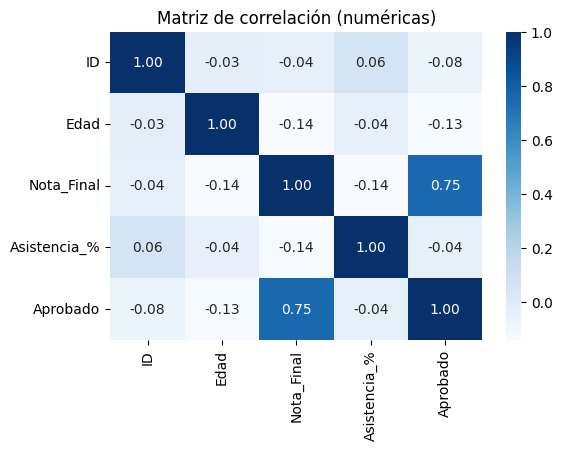

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación (numéricas)")
plt.show()


## Preprocesamiento

In [ ]:

from sklearn.preprocessing import StandardScaler

df_prep = df.copy()

# 🔹 Escalado de numéricas
scaler = StandardScaler()
df_prep[["Edad", "Asistencia_%"]] = scaler.fit_transform(df_prep[["Edad", "Asistencia_%"]])

# 🔹 One-Hot Encoding
df_prep = pd.get_dummies(df_prep, columns=["Carrera"], drop_first=True)

df_prep.head()


,ID,Nombre,Edad,Nota_Final,Asistencia_%,Aprobado,Carrera_Educación,Carrera_Física,Carrera_Ingeniería,Carrera_Matemática,Carrera_Química
0,1,Estudiante1,0.496068,6.0,0.889461,True,False,False,False,False,False
1,2,Estudiante2,-1.267016,6.3,0.962909,True,False,False,False,True,False
2,3,Estudiante3,-1.267016,4.4,1.623946,True,True,False,False,False,False
3,4,Estudiante4,-0.625895,6.9,-0.285715,True,False,False,False,False,False
4,5,Estudiante5,1.137189,5.7,1.697394,True,False,True,False,False,False


## División en entrenamiento y prueba

In [ ]:

from sklearn.model_selection import train_test_split

features = ["Asistencia_%", "Edad"] + [c for c in df_prep.columns if c.startswith("Carrera_")]

y_reg = df_prep["Nota_Final"]
y_clf = df_prep["Aprobado"].astype(int)

X = df_prep[features]

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)


## Ejercicio A — Regresión lineal

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", round(rmse, 3))
print("Coeficientes:", dict(zip(X.columns, linreg.coef_)))


RMSE: 1.148
Coeficientes: {'Asistencia_%': np.float64(-0.23947939999180104), 'Edad': np.float64(-0.17218094084773344), 'Carrera_Educación': np.float64(-0.43846317546887015), 'Carrera_Física': np.float64(-0.1122262488787173), 'Carrera_Ingeniería': np.float64(0.15017557973487433), 'Carrera_Matemática': np.float64(-0.04972515759359283), 'Carrera_Química': np.float64(0.05003014470305367)}


## Ejercicio B — Clasificación con árbol

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

print("Accuracy (test):", round(accuracy_score(yc_test, yc_pred), 3))
print("Reporte de clasificación:", classification_report(yc_test, yc_pred))
print("Matriz de confusión:", confusion_matrix(yc_test, yc_pred))


Accuracy (test): 0.8
Reporte de clasificación:               precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.79      1.00      0.89        31

    accuracy                           0.80        40
   macro avg       0.90      0.56      0.54        40
weighted avg       0.84      0.80      0.73        40

Matriz de confusión: [[ 1  8]
 [ 0 31]]


## Underfitting vs Overfitting

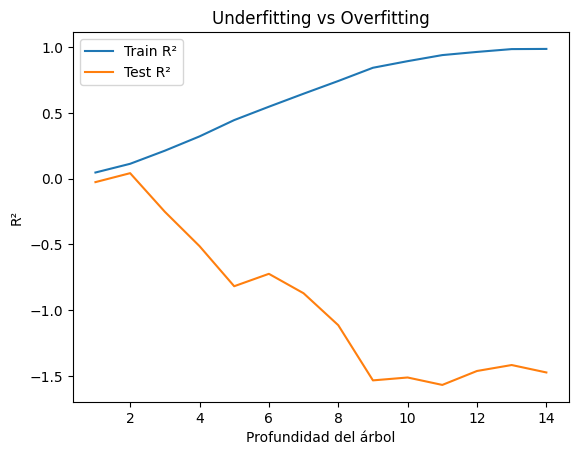

In [ ]:

from sklearn.tree import DecisionTreeRegressor

depths = range(1, 15)
train_scores, test_scores = [], []

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

plt.plot(depths, train_scores, label="Train R²")
plt.plot(depths, test_scores, label="Test R²")
plt.xlabel("Profundidad del árbol")
plt.ylabel("R²")
plt.title("Underfitting vs Overfitting")
plt.legend()
plt.show()



## Resumen de hallazgos

1. ¿Qué variables resultaron más útiles para predecir `Nota_Final`?  
2. ¿Qué RMSE obtuviste y cómo lo interpretas?  
3. En clasificación, ¿cuál fue el accuracy y qué muestran los errores en la matriz de confusión?  
4. ¿Observaste underfitting u overfitting? ¿En qué profundidad?  
5. ¿Qué decisión tomarías para mejorar el modelo en una siguiente iteración?
